### Sujet
Peut-on établir un lien entre la densité de médecins par spécialité  et par territoire et la pratique du dépassement d'honoraires ? Est-ce  dans les territoires où la densité est la plus forte que les médecins  pratiquent le moins les dépassement d'honoraires ? Est ce que la densité de certains médecins / praticiens est corrélé à la densité de population pour certaines classes d'ages (bebe/pediatre, personnes agées / infirmiers etc...) ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fichier = "Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls"

df = pd.read_excel(fichier, sheet_name="Spécialistes" )

cols= ["Spécialité",
      "Département",
      "Effectif",
      "Honoraire",
      "Dépassement",
      "Déplacement",
      "Total"]

# Renommage des colonnes
df.columns=cols

# Suppression des lignes avec Total dans le département
dfsanstotal = df[~df["Département"].str.contains("TOTAL")]
dfsanstotal = dfsanstotal[~dfsanstotal["Spécialité"].str.contains("TOTAL")]

# Conversion des colonne en numérique et remplace nc par NAN
dfsanstotal['Honoraire']=pd.to_numeric(dfsanstotal['Honoraire'].loc[:], errors='coerce', downcast="integer")
dfsanstotal['Dépassement']=pd.to_numeric(dfsanstotal['Dépassement'], errors='coerce', downcast="integer")
dfsanstotal['Déplacement']=pd.to_numeric(dfsanstotal['Déplacement'], errors='coerce', downcast="integer")
dfsanstotal['Total']=pd.to_numeric(dfsanstotal['Total'], errors='coerce', downcast="integer")

dfNoNa = dfsanstotal.dropna()
dfclean = dfNoNa[dfNoNa['Effectif']!=0]

In [2]:
dfclean.describe()

,Effectif,Honoraire,Dépassement,Déplacement,Total
count,1143.000000,1.143000e+03,1.143000e+03,1143.000000,1.143000e+03
mean,41.104112,9.197484e+06,2.117096e+06,133.816247,1.131471e+07
std,57.251042,1.198217e+07,5.153323e+06,809.766039,1.525156e+07
min,11.000000,5.712963e+05,2.940000e+02,0.000000,8.954919e+05
25%,16.000000,3.061373e+06,1.471763e+05,0.000000,3.713198e+06
50%,24.000000,5.245749e+06,7.371389e+05,0.000000,6.301796e+06
75%,47.000000,1.013674e+07,2.058710e+06,3.810000,1.275724e+07
max,1308.000000,1.290769e+08,7.107912e+07,11798.680000,1.958339e+08


In [3]:
NumCols= ["Effectif",
      "Honoraire",
      "Dépassement"]
dfGroupbySpecialite = dfclean.groupby(['Spécialité'])[NumCols].sum()

In [4]:
dfGroupbySpecialite["txdepass"] = (100 * dfGroupbySpecialite.Dépassement / dfGroupbySpecialite.Honoraire).round(1)
dfGroupbySpecialite = dfGroupbySpecialite.sort_values("txdepass", ascending=False)
dfGroupbySpecialite["voldepass"] = (100 * dfGroupbySpecialite.Dépassement / dfGroupbySpecialite.Dépassement.sum()).round(2)
dfGroupbySpecialite["%effectif"] = (100 * dfGroupbySpecialite.Effectif / dfGroupbySpecialite.Effectif.sum()).round(2)
dfGroupbySpecialite

,Effectif,Honoraire,Dépassement,txdepass,voldepass,%effectif
Spécialité,,,,,,
46- Chirurgie plastique reconstructrice et esthétique,476,3.327147e+07,4.926751e+07,148.1,2.04,1.01
18- Stomatologie,347,4.361773e+07,4.472301e+07,102.5,1.85,0.74
75- Psychiatrie de l'enfant et de l'adolescent,12,5.712963e+05,5.302132e+05,92.8,0.02,0.03
10- Neurochirurgie,71,1.784430e+07,1.469820e+07,82.4,0.61,0.15
45- Chirurgie maxillo-faciale et stomatologie,85,1.471975e+07,9.816787e+06,66.7,0.41,0.18
09- Médecine interne,143,1.039443e+07,6.759136e+06,65.0,0.28,0.30
48- Chirurgie vasculaire,72,1.307277e+07,7.586831e+06,58.0,0.31,0.15
49- Chirurgie viscérale et digestive,228,4.296127e+07,2.436044e+07,56.7,1.01,0.49
41- Chirurgie orthopédique et traumatologie,2277,5.394212e+08,3.016017e+08,55.9,12.46,4.85


In [5]:
dfDépartements = pd.DataFrame(columns=['Département'], data=dfclean.Département.unique())
dfSpécialités = pd.DataFrame(columns=["Spécialité"], data=dfclean.Spécialité.unique())
dfEffectifParSpecialité = dfclean.groupby(['Spécialité'])[NumCols].sum()
dfEffectifParSpecialité = dfEffectifParSpecialité.sort_values(by='Effectif', ascending=False)

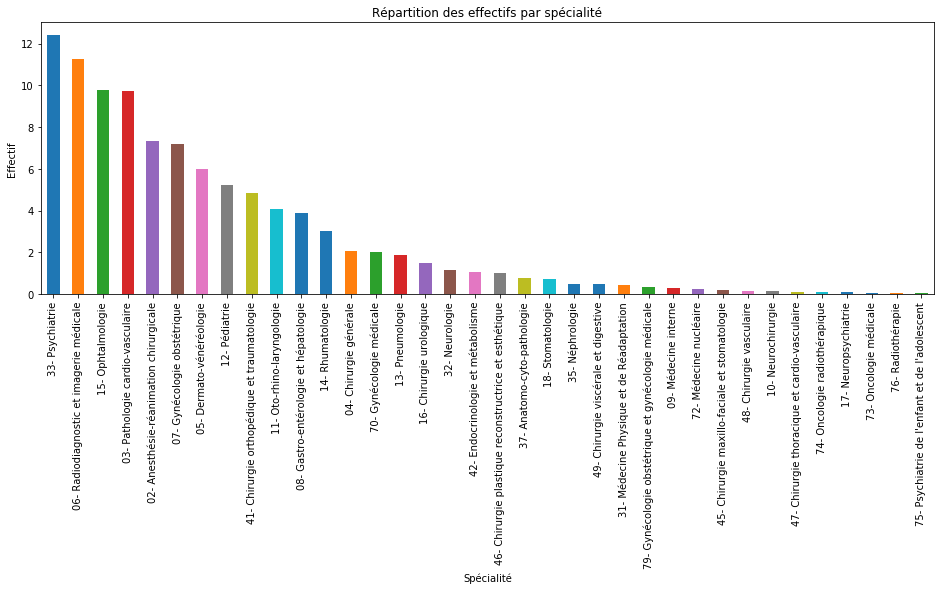

In [6]:
plt.figure(figsize=(16,5))
dfGroupbySpecialite["%effectif"].sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Effectif')
plt.title("Répartition des effectifs par spécialité")
plt.show()

<Figure size 1152x360 with 0 Axes>

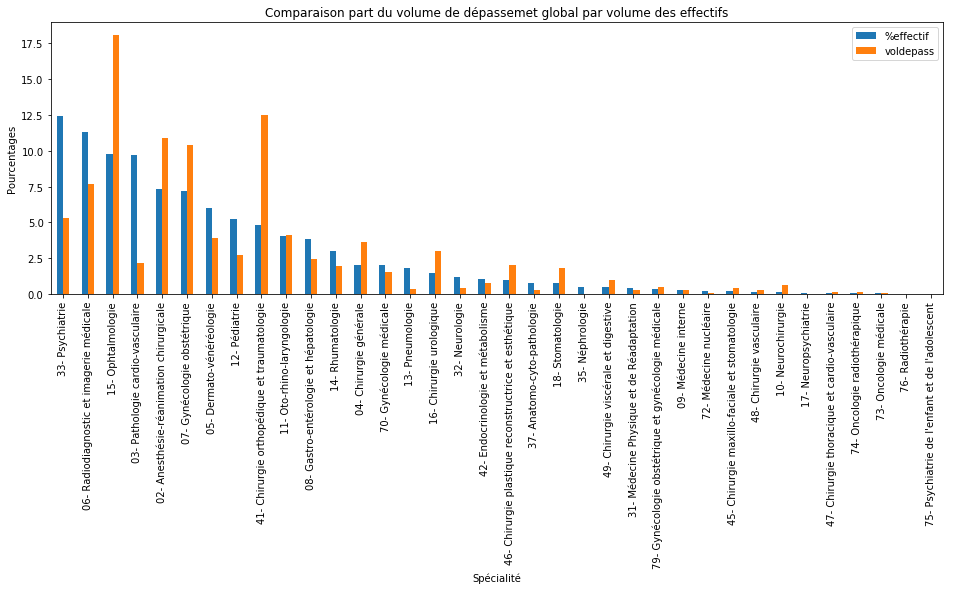

In [7]:
plt.figure(figsize=(16,5))
dfGroupbySpecialite[["%effectif", "voldepass"]].sort_values(by='%effectif',ascending=False).plot(kind='bar', figsize=(16,5))
plt.xticks(rotation=90)
plt.ylabel('Pourcentages')
plt.title("Comparaison part du volume de dépassemet global par volume des effectifs")
plt.show()

On s'aperçoit que 4 spécialités représentent à elles seules près de 55% de tous les dépassements alors qu'elles ne représente que 30% des effectifs :
    - Ophtalmologie
    - Chirurgie orthopédique et traumatologie
    - Anesthésie
    - Gynécologie

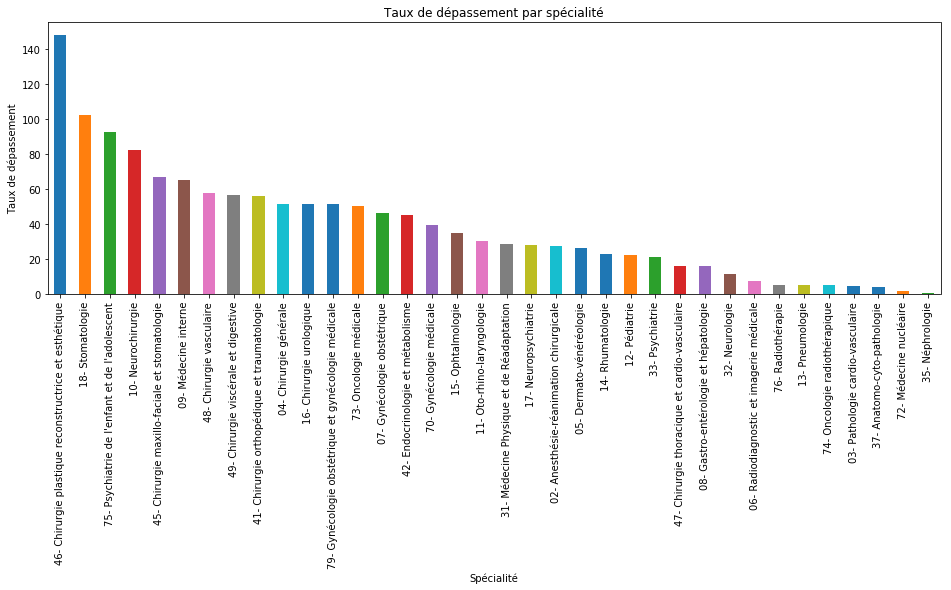

In [8]:
plt.figure(figsize=(16,5))
dfGroupbySpecialite["txdepass"].sort_values(ascending=False).plot(kind='bar', figsize=(16,5))
plt.xticks(rotation=90)
plt.ylabel('Taux de dépassement')
plt.title("Taux de dépassement par spécialité")
plt.show()

In [9]:
fichier = "estim-pop-dep-sexe-gca-1975-2018.xls"

dfpopulation = pd.read_excel(fichier, sheet_name="2018", skiprows=4)

In [10]:
dfpopulation

,Unnamed: 0,Unnamed: 1,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans.1,20 à 39 ans.1,40 à 59 ans.1,60 à 74 ans.1,75 ans et plus.1,Total.1,0 à 19 ans.2,20 à 39 ans.2,40 à 59 ans.2,60 à 74 ans.2,75 ans et plus.2,Total.2
0,01,Ain,168332.0,150036.0,178815.0,100273.0,52198.0,649654.0,86472.0,75127.0,89131.0,48439.0,21137.0,320306.0,81860.0,74909.0,89684.0,51834.0,31061.0,329348.0
1,02,Aisne,134580.0,116004.0,141125.0,94539.0,48038.0,534286.0,68806.0,57892.0,70051.0,45213.0,17872.0,259834.0,65774.0,58112.0,71074.0,49326.0,30166.0,274452.0
2,03,Allier,70365.0,64250.0,89352.0,70910.0,44101.0,338978.0,36026.0,32453.0,43865.0,33297.0,16982.0,162623.0,34339.0,31797.0,45487.0,37613.0,27119.0,176355.0
3,04,Alpes-de-Haute-Provence,34245.0,29897.0,43316.0,33930.0,20276.0,161664.0,17863.0,15007.0,21083.0,16594.0,8348.0,78895.0,16382.0,14890.0,22233.0,17336.0,11928.0,82769.0
4,05,Hautes-Alpes,31059.0,28863.0,38786.0,27200.0,15668.0,141576.0,15938.0,14534.0,19301.0,13205.0,6336.0,69314.0,15121.0,14329.0,19485.0,13995.0,9332.0,72262.0
5,06,Alpes-Maritimes,229665.0,240654.0,283747.0,195046.0,131502.0,1080614.0,117879.0,117832.0,136788.0,89184.0,50531.0,512214.0,111786.0,122822.0,146959.0,105862.0,80971.0,568400.0
6,07,Ardèche,72938.0,62786.0,89606.0,65991.0,37236.0,328557.0,37132.0,31269.0,44713.0,32101.0,15117.0,160332.0,35806.0,31517.0,44893.0,33890.0,22119.0,168225.0
7,08,Ardennes,63644.0,57546.0,73746.0,49832.0,26571.0,271339.0,32762.0,28803.0,36619.0,24004.0,10050.0,132238.0,30882.0,28743.0,37127.0,25828.0,16521.0,139101.0
8,09,Ariège,31628.0,28659.0,41209.0,31723.0,19102.0,152321.0,16345.0,14503.0,20342.0,15704.0,7641.0,74535.0,15283.0,14156.0,20867.0,16019.0,11461.0,77786.0
9,10,Aube,75097.0,70414.0,79627.0,55090.0,31395.0,311623.0,38802.0,35308.0,39137.0,26129.0,11812.0,151188.0,36295.0,35106.0,40490.0,28961.0,19583.0,160435.0


In [11]:
dfpopulation["Département"] = dfpopulation["Unnamed: 0"].astype(str) + "- " + dfpopulation["Unnamed: 1"]
dfpopDépartement = dfpopulation[["Département", "Total"]]
dfpopDépartement = dfpopDépartement.dropna()
dfpopDépartement.columns = ["Département","PopulationTotale"]
dfpopDépartement["PopulationTotale"] = dfpopDépartement["PopulationTotale"].astype(int)
dfpopDépartement

,Département,PopulationTotale
0,01- Ain,649654
1,02- Aisne,534286
2,03- Allier,338978
3,04- Alpes-de-Haute-Provence,161664
4,05- Hautes-Alpes,141576
5,06- Alpes-Maritimes,1080614
6,07- Ardèche,328557
7,08- Ardennes,271339
8,09- Ariège,152321
9,10- Aube,311623


In [12]:
dfwork = pd.merge(dfclean, dfpopDépartement, how='inner', on="Département")
dfwork = dfwork.drop(["Total", "Déplacement"], axis=1)
dfwork["Densité"] = 100 * dfwork.Effectif / dfwork.PopulationTotale
dfwork.head(20)

,Spécialité,Département,Effectif,Honoraire,Dépassement,PopulationTotale,Densité
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.33,2496180.45,649654,0.002617
1,03- Pathologie cardio-vasculaire,01- Ain,20,6048363.47,252877.05,649654,0.003079
2,05- Dermato-vénéréologie,01- Ain,14,1620817.75,339217.72,649654,0.002155
3,06- Radiodiagnostic et imagerie médicale,01- Ain,39,17403976.84,2374782.05,649654,0.006003
4,07- Gynécologie obstétrique,01- Ain,16,2973058.99,1149660.54,649654,0.002463
5,08- Gastro-entérologie et hépatologie,01- Ain,13,2088560.50,299713.93,649654,0.002001
6,12- Pédiatrie,01- Ain,12,1953942.24,152737.07,649654,0.001847
7,15- Ophtalmologie,01- Ain,20,6992462.82,2530891.60,649654,0.003079
8,33- Psychiatrie,01- Ain,12,1035595.82,113494.25,649654,0.001847
9,41- Chirurgie orthopédique et traumatologie,01- Ain,12,1903402.86,1010938.75,649654,0.001847


In [13]:
NumCols2= ["Effectif",
      "Honoraire",
      "Dépassement",
      "PopulationTotale",
       "Densité"]
dfGroupbySpecialiteDep = dfwork.groupby(['Spécialité'])[NumCols2].sum()
dfGroupbySpecialiteDep

,Effectif,Honoraire,Dépassement,PopulationTotale,Densité
Spécialité,,,,,
02- Anesthésie-réanimation chirurgicale,3130,8.814175e+08,2.223158e+08,54466452,0.358073
03- Pathologie cardio-vasculaire,4046,1.044217e+09,3.764096e+07,58606861,0.518806
04- Chirurgie générale,792,1.513741e+08,6.805148e+07,37106541,0.068356
05- Dermato-vénéréologie,2429,3.263574e+08,6.734670e+07,53154571,0.255183
06- Radiodiagnostic et imagerie médicale,4763,2.271858e+09,1.131445e+08,59268956,0.612524
07- Gynécologie obstétrique,2882,4.778338e+08,1.938149e+08,55754595,0.329921
08- Gastro-entérologie et hépatologie,1601,3.423929e+08,4.532116e+07,48907560,0.164850
09- Médecine interne,82,7.841036e+06,2.386871e+06,10389355,0.005044
10- Neurochirurgie,48,1.401385e+07,8.998226e+06,7924303,0.002541
